## Hypothyroidism Dataset - Unsupervised Exam 2023

In [ ]:
!pip install gower
!pip install kneed

### Part 1: Data Preprocessing

#### 1 - Import Libraries

In [ ]:
import math
import gower
from kneed import KneeLocator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE


#### 2 - Data Cleaning

In [ ]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/unsupervised_exam/'
file_path   = folder_path + 'Unsupervised Learning 23-24 - Project Dataset.csv'

In [ ]:
# The count and type of the attributes in dataset
# 15 attributes -- binary
#  6 attributes -- continuous

In [ ]:
# Load the CSV file with custom delimiter ';'
df = pd.read_csv( file_path, sep=';', header=None)
print(df.shape)
df.head(2)

(7201, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Row,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,...,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20,NaN,NaN
1,0,"0,750000",1,0,1,1,1,1,1,0,...,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000",NaN,NaN


In [ ]:
## dropping the NaN columns
df = df.drop(columns = [0,22,23], axis=1)
print(df.shape)
df.head(2)

(7201, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
1,"0,750000",1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000"


In [ ]:
## dropping the first row
df = df.drop(0)
print(df.shape)
df.head(2)

(7200, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,"0,750000",1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000"
2,"0,239583",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,"0,000472","0,164345","0,235786","0,537037","0,165625"


In [ ]:
# List of columns to convert -- from string to float
columns_to_convert = [ 1, 17, 18, 19, 20, 21 ]

In [ ]:
# Replace comma with dot and convert to float for each column in the list
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace(',', '.').astype(float))
print(df.shape)
df.head(2)

(7200, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
2,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625


In [ ]:
## save the new cleaned csv file
cleaned_csv_path = folder_path + 'cleaned_data_unsupervised.csv'
df.to_csv( cleaned_csv_path )

In [ ]:
## read cleaned dataset
df = pd.read_csv( cleaned_csv_path ).drop('Unnamed: 0', axis = 1 )
print(df.shape)
df.head(3)

(7200, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750


In [ ]:
## checking the datatypes of the attributes
df.dtypes

1     float64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

#### 3 - Checking for Null values

In [ ]:
## No NaN values found in the dataset
df.isna().sum().any()

False

#### 4 - Checking and Removing Duplicate rows

In [ ]:
# find duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f'Duplicate rows Found: {duplicate_rows_count}')

Duplicate rows Found: 71


In [ ]:
## get the duplicated rows
duplicate_rows = df[ df.duplicated() ]
duplicate_rows

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
267,0.354167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003566,0.111978,0.182575,0.379630,0.171984
323,0.322917,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003566,0.111978,0.182575,0.379630,0.171984
336,0.260417,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003566,0.111978,0.182575,0.379630,0.171984
388,0.322917,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003566,0.111978,0.182575,0.379630,0.171984
419,0.322917,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003566,0.111978,0.182575,0.379630,0.171984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6079,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.004377,0.109192,0.186104,0.365741,0.180875
6452,0.395833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.004377,0.109192,0.186104,0.365741,0.180875
6454,0.343750,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.004377,0.109192,0.186104,0.365741,0.180875
6502,0.510417,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.004377,0.109192,0.186104,0.365741,0.180875


In [ ]:
### remove the duplicated rows -- 7200-71 = 7129
df_ = df.drop_duplicates()
print(df_.shape)
df_.head(2)

(7129, 21)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625


#### 5 - Plotting the Distribution of Bianry Attributes

Binary columns: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
Count of Binary columns: 15


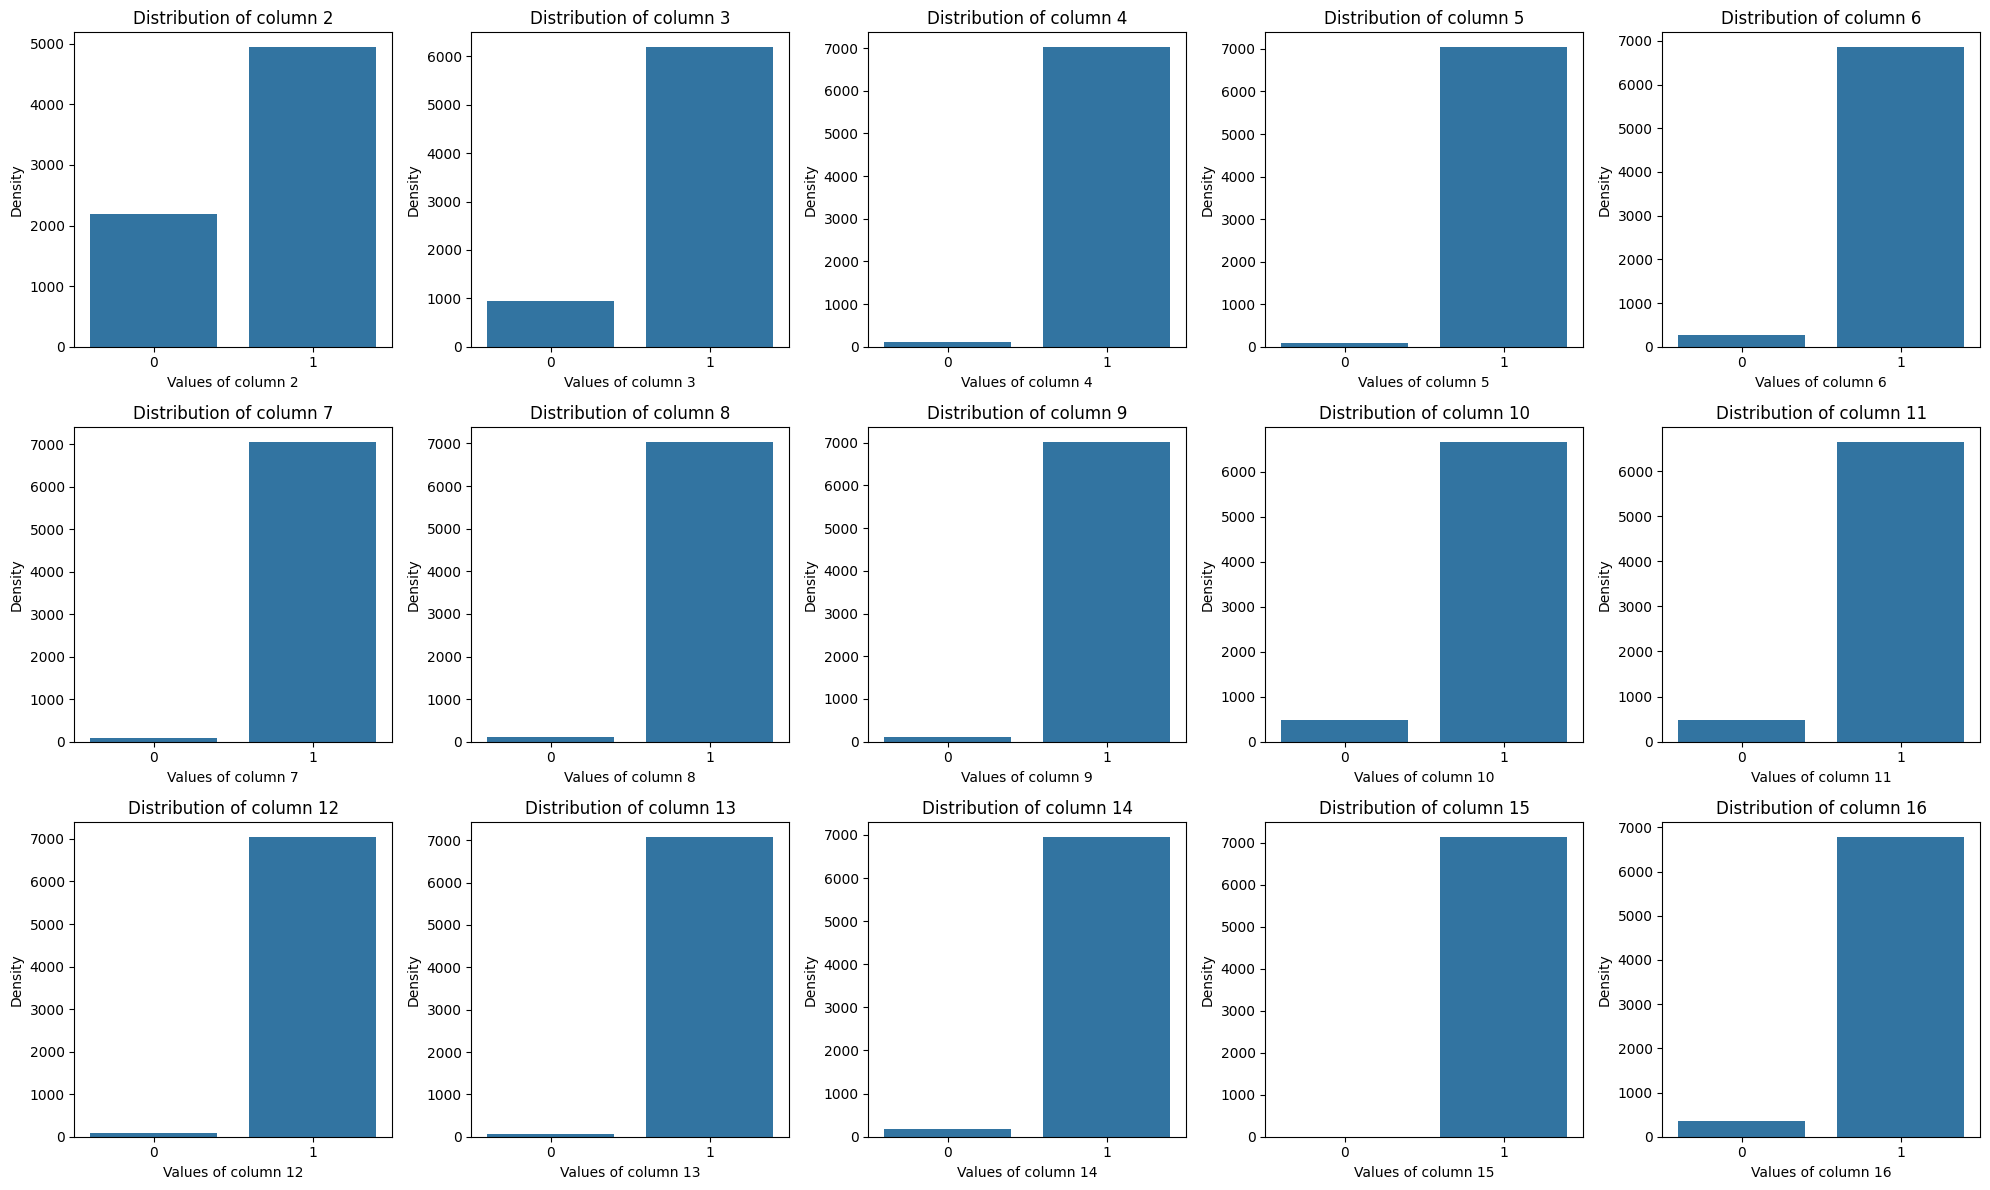

In [ ]:
binary_cols = [ col for col in df_.columns if df_[col].nunique() == 2 ]
print(f'Binary columns: {binary_cols}')
print(f'Count of Binary columns: {len(binary_cols)}')

# Set up the matplotlib figure with subplots
num_cols = 5

# Calculate the number of rows needed
num_rows = (len(binary_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(binary_cols):
  if df_[col].nunique() <= 10:
    # For columns with a small number of unique values, use countplot
    sns.countplot(data=df_, x=col, ax=axes[i])
  else:
    # For other columns, use histplot
    sns.histplot(data=df_, x=col, kde=True, ax=axes[i])

  axes[i].set_title(f'Distribution of column {col}')
  axes[i].set_xlabel(f'Values of column {col}')
  axes[i].set_ylabel('Density')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 6 - Check the Variance and drop low Variance Attributes

In [ ]:
dict_var = {}
for i in binary_cols:
  # print(df[i].var())
  # print(df[i].value_counts( normalize = True )*100)
  # print('*'*20, '\n')
  dict_var[i] = round(df_[i].var(), 3)
# Sort the dictionary by its values (variance)
sorted_variance_dict = dict(sorted(dict_var.items(), key=lambda item: item[1]))
sorted_variance_dict

{'15': 0.0,
 '13': 0.008,
 '7': 0.011,
 '5': 0.013,
 '12': 0.013,
 '8': 0.014,
 '4': 0.015,
 '9': 0.017,
 '14': 0.025,
 '6': 0.037,
 '16': 0.047,
 '10': 0.062,
 '11': 0.064,
 '3': 0.114,
 '2': 0.213}

In [ ]:
# Set threshold and identify low variance columns
low_variance_threshold = 0.011

# Get the names of the keys that do not satisfy the threshold
low_variance_columns = [key for key, value in sorted_variance_dict.items()
if value <= low_variance_threshold]
print(f'Columns with low variance: {low_variance_columns}')

Columns with low variance: ['15', '13', '7']


In [ ]:
df_ = df_.drop( columns = low_variance_columns, axis = 1)
print(df_.shape)
df_.head(3)

(7129, 18)


,1,2,3,4,5,6,8,9,10,11,12,14,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,0,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750


#### 7 - Plotting the Distribution of Continuous Attributes

In [ ]:
def continuous_distribution( df, continuous_columns ):
  # Set up the matplotlib figure with subplots
  num_cols = 3
  num_rows = (len(continuous_columns) + num_cols - 1) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

  # Flatten the axes array for easy iteration
  axes = axes.flatten()

  # Plot each continuous column
  for i, col in enumerate(continuous_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of column {col}')
    axes[i].set_xlabel(f'Values of column {col}')
    axes[i].set_ylabel('Density')

  # Remove any unused subplots
  for j in range(len(continuous_columns), len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

continuous columns: Index(['1', '17', '18', '19', '20', '21'], dtype='object')
Count of continuous columns: 6


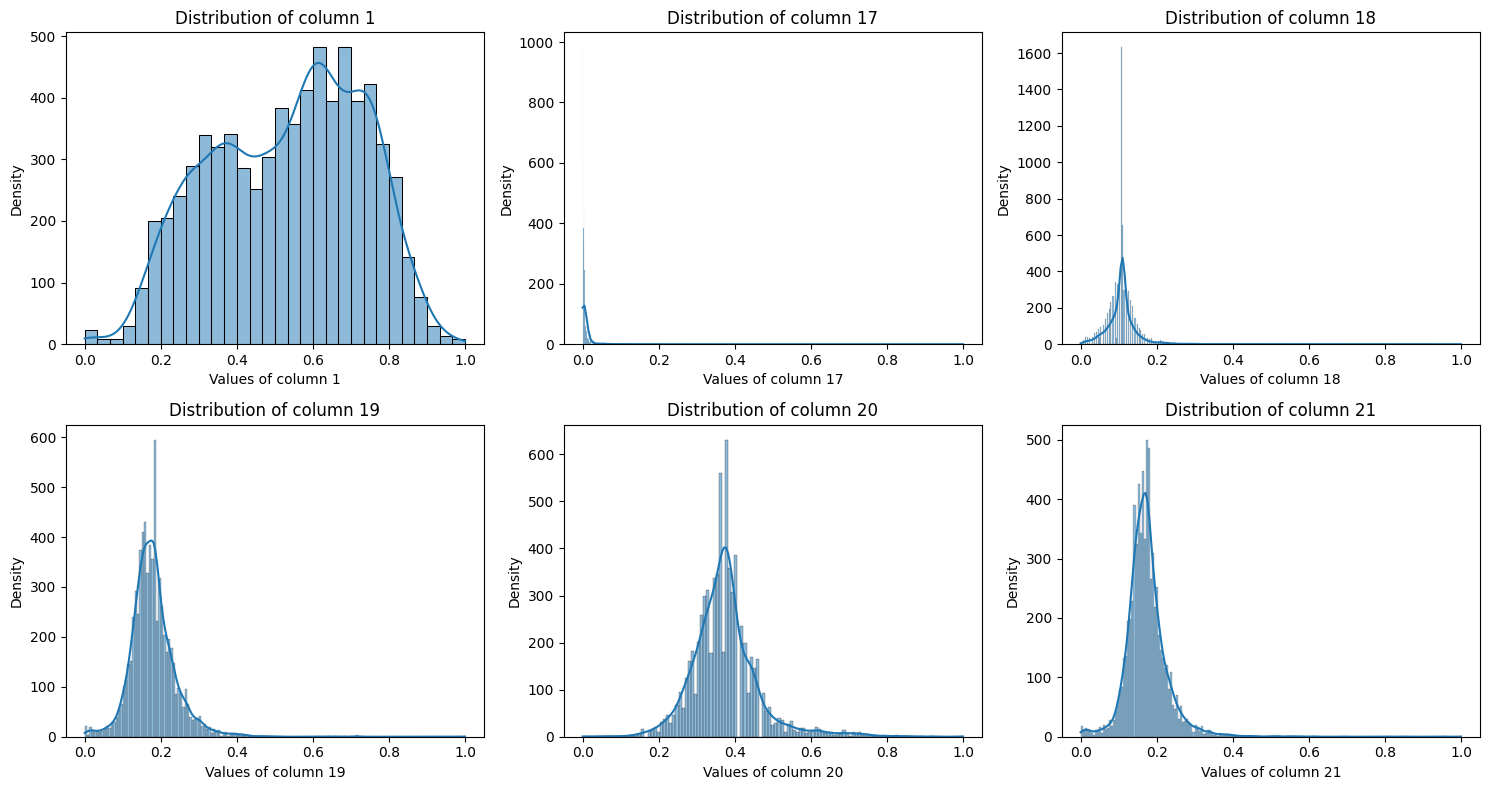

In [ ]:
# Separate continuous columns
continuous_columns = df_.select_dtypes(include=['float64']).columns
print(f'continuous columns: {continuous_columns}')
print(f'Count of continuous columns: {len(continuous_columns)}')

continuous_distribution( df_, continuous_columns )

In [ ]:
### Check the duplicates again 7129 - 4 = 7125
df_ = df_.drop_duplicates()
print(df_.shape)

(7125, 18)


#### 8 - Data Normalization -- RobustScaler


In [ ]:
##### --- SCALING --- ######
# Initialize the scaler you want to use: MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
scaler = RobustScaler() ## good StandardScaler, RobustScaler

X     = df_.to_numpy()
[N,M] = np.shape(X)

# Apply the scaling to data
X_transformed = scaler.fit_transform(df_)
print(X_transformed.shape)

(7125, 18)


(7125, 18)


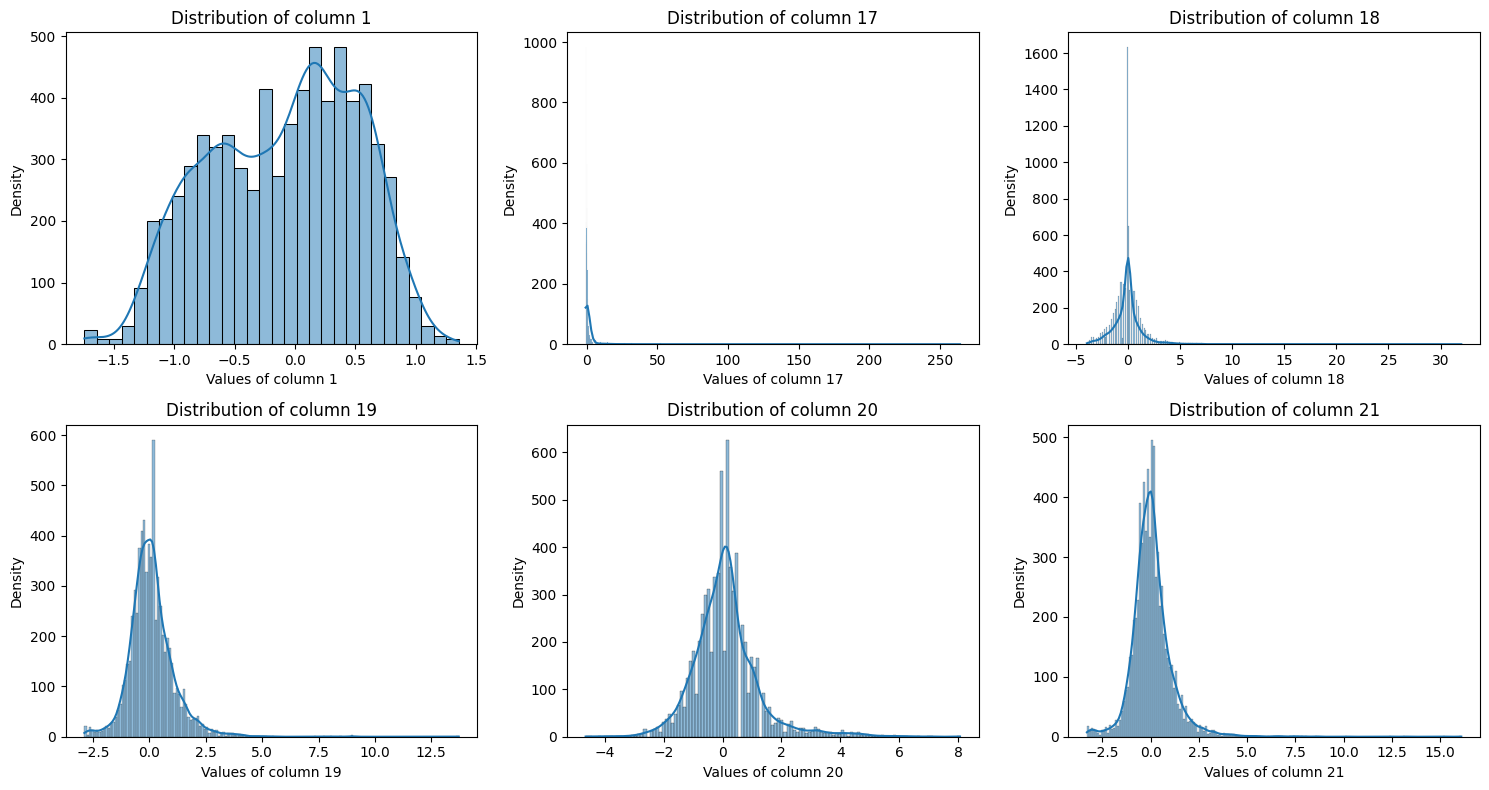

In [ ]:
# ## Distibution of continuous variables after normalization
df_transformed = pd.DataFrame( X_transformed, columns = df_.columns )
print(df_transformed.shape)
# continuous_distribution( df_transformed )
continuous_distribution( df_transformed, continuous_columns )

#### 9 - PCA Transform

In [ ]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 3 )
pca_result = pca.fit_transform( X_transformed )
print(pca_result.shape)
print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))


(7125, 3)
PCA: explained variation per principal component: [0.95 0.02 0.01]


#### 10 - T-SNE for Visualization

In [ ]:
tsne = TSNE( n_components = 2, random_state = 123 )
tsne_result = tsne.fit_transform( X_transformed )
print(tsne_result.shape)

(7125, 2)


#### 11 - Distance Measuring Technique - Gower's Distance Metric

In [ ]:
# Compute Gower distance matrix
gower_dist_matrix = gower.gower_matrix(df_)
gower_dist_matrix.shape

(7125, 7125)

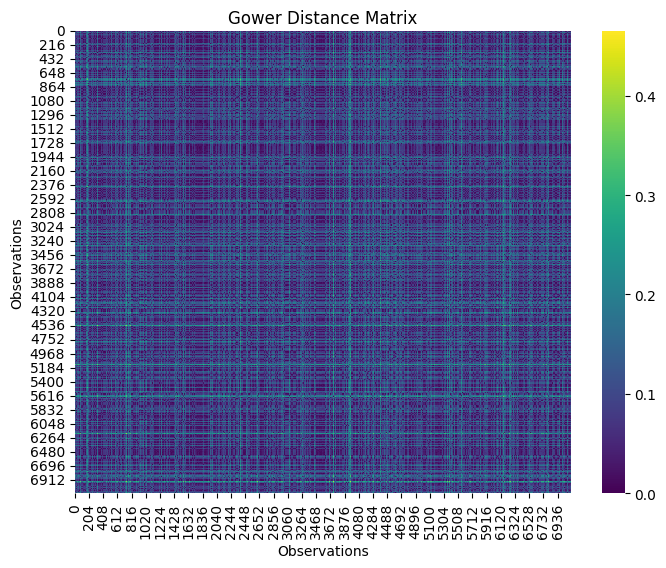

In [ ]:
# Visualization function for distance matrices
def plot_distance_matrix(dist_matrix, title):
  plt.figure(figsize=(8, 6))
  sns.heatmap(dist_matrix, cmap='viridis')
  plt.title(title)
  plt.xlabel('Observations')
  plt.ylabel('Observations')
  plt.show()

# Plotting the Gower Distance Matrix
plot_distance_matrix(gower_dist_matrix, "Gower Distance Matrix")

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.spatial.distance import pdist, squareform
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Normalize the data
# scaler = StandardScaler()
# df_normalized = scaler.fit_transform(df)

# # Compute Euclidean distance matrix
# euclidean_dist_matrix = squareform(pdist(df_normalized, metric='euclidean'))

# # Visualization function for distance matrices
# def plot_distance_matrix(dist_matrix, title):
#   plt.figure(figsize=(10, 8))
#   sns.heatmap(dist_matrix, cmap='viridis')
#   plt.title(title)
#   plt.show()

# # Plotting the Euclidean distance matrix
# plot_distance_matrix(euclidean_dist_matrix, "Euclidean Distance Matrix (Normalized Data)")

### Part 2: Anomaly Detection

#### Utility Functions

In [ ]:
def plotting_nn(labels1, labels2, labels3, des1, des2, des3, pca_result, out1, out2, out3):
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  fig, axes = plt.subplots( 1, 3, figsize=(20, 8) )  # Create a figure with 3 subplots in one row

  # Plot for labels1
  sns.scatterplot(x=pca_result[:, 2], y=pca_result[:, 1], hue=labels1, palette=['black', 'orange'], ax=axes[0])
  axes[0].set_title( '1: NN Anomaly Detection - ' + des1 + ' ' + str(out1) )
  axes[0].set_xlabel('PC1')
  axes[0].set_ylabel('PC2')
  axes[0].legend(['normal', 'outlier'])
  axes[0].grid()

  # Plot for labels2
  sns.scatterplot(x=pca_result[:, 2], y=pca_result[:, 1], hue=labels2, palette=['black', 'orange'], ax=axes[1])
  axes[1].set_title('1: NN Anomaly Detection - ' + des2 +  ' ' + str(out2) )
  axes[1].set_xlabel('PC1')
  axes[1].set_ylabel('PC2')
  axes[1].legend(['normal', 'outlier'])
  axes[1].grid()

  # Plot for labels3
  sns.scatterplot(x=pca_result[:, 2], y=pca_result[:, 1], hue=labels3, palette=['black', 'orange'], ax=axes[2])
  axes[2].set_title( '1: NN Anomaly Detection - ' + des3  +  ' ' + str(out3) )
  axes[2].set_xlabel('PC1')
  axes[2].set_ylabel('PC2')
  axes[2].legend(['normal', 'outlier'])
  axes[2].grid()

  plt.tight_layout()
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotting(labels, description, pca_result, tsne_result):
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))

  # Plot PCA result
  sns.scatterplot(x=pca_result[:, 2], y=pca_result[:, 1], hue=labels, palette=['black', 'orange'], ax=axes[0])
  axes[0].set_title(f'PCA: {description}')
  axes[0].set_xlabel('PC1')
  axes[0].set_ylabel('PC2')
  axes[0].legend(['normal', 'outlier'])
  axes[0].grid()

  # Plot t-SNE result
  sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette=['black', 'orange'], ax=axes[1])
  axes[1].set_title(f't-SNE: {description}')
  axes[1].set_xlabel('t-SNE Dimension 1')
  axes[1].set_ylabel('t-SNE Dimension 2')
  axes[1].legend(['normal', 'outlier'])
  axes[1].grid()

  plt.tight_layout()
  plt.show()

# Example usage:
# Replace labels, description, pca_result, and tsne_result with your actual data
# plotting(labels, "Dataset Visualization", pca_result, tsne_result)


#### 1: Nearest neighbor (NN)

In [ ]:
# Apply the algorithm
from sklearn.neighbors import NearestNeighbors as knn
neighborhood_order = 50

# Find neighborhood
neighborhood_set   = knn( n_neighbors = neighborhood_order, algorithm = 'ball_tree').fit( X_transformed )
distances, indices = neighborhood_set.kneighbors(X_transformed)
print(f'shape of  X_transformed = {X_transformed.shape}')
print(f'shape of the distances  = {distances.shape}')
print(f'shape of the indices    = {indices.shape}')

# compute distances from kth nearest neighbors and sort them
dk_sorted     = np.sort(distances[:,-1])
dk_sorted_ind = np.argsort(distances[:,-1])

shape of  X_transformed = (7125, 18)
shape of the distances  = (7125, 50)
shape of the indices    = (7125, 50)


[6822, 3.47]


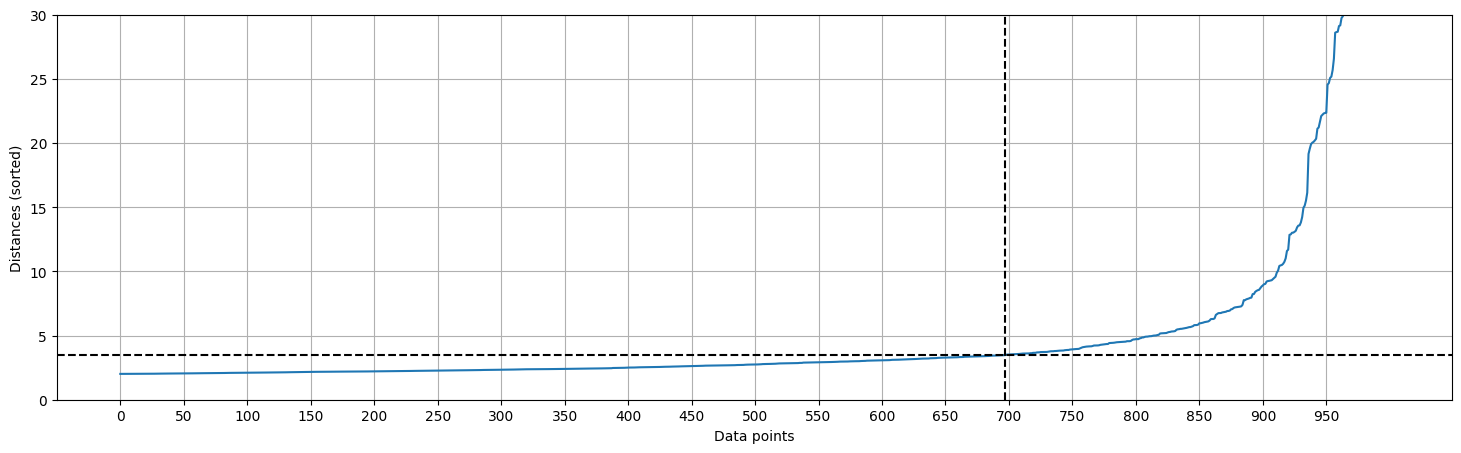

Method 1: use the knee point 
Outliers Found:  303


In [ ]:
# METHOD 1: use the knee point                                 --> knee_x, knee_y

# The purpose of knee section is to identify a threshold distance that separates normal data points from outliers.
# Identify the outliers as those points with too high distance from their own 5th nearest neighbor
# see other examples: https://kneed.readthedocs.io/en/stable/parameters.html

i = np.arange(len(distances)) # 180
knee = KneeLocator(i, dk_sorted, curve='convex', direction='increasing', interp_method='interp1d', online=True)

knee_x = knee.knee
knee_y = knee.knee_y    # OR: distances[knee.knee]
print([knee_x, np.round(knee_y,2)])

# Plot distances
figKNN = plt.figure('kNN distance values', figsize=(18,5))
plt.plot(dk_sorted[-1000:])
plt.xlabel('Data points', fontsize=10)
plt.xticks(np.arange(0, 1000, step=50))
plt.ylim(0, 30)  # Set y-axis limit to 100
plt.ylabel('Distances (sorted)', fontsize=10)
plt.axvline(x=knee_x - (N - 1000), color='k', linestyle='--')
plt.axhline(y=knee_y, color='k', linestyle='--')
plt.grid()
plt.show()

id_points2remove_1 = dk_sorted_ind[knee_x:]
id1_sorted_1       = np.sort(id_points2remove_1)
print('Method 1: use the knee point ')
count1 = len(id1_sorted_1)
print('Outliers Found: ',count1)
NN_labels1 = np.ones(N)
NN_labels1[id1_sorted_1] = -1

In [ ]:
# 2: decide a percentage of outliers a-priori (n%)      --> n = 1%
# 5% of the data points will be treated as outliers.
n = 0.05
Q = np.ceil(N*n).astype(int)
id_points2remove_2 = dk_sorted_ind[-Q:]
id1_sorted_2       = np.sort(id_points2remove_2)
print('Method 2: decide a percentage of outliers a-priori (n%) ')
count2 = len(id1_sorted_2)
print('Outliers Found: ',count2)
NN_labels2 = np.ones(N)
NN_labels2[id1_sorted_2] = -1

Method 2: decide a percentage of outliers a-priori (n%) 
Outliers Found:  357


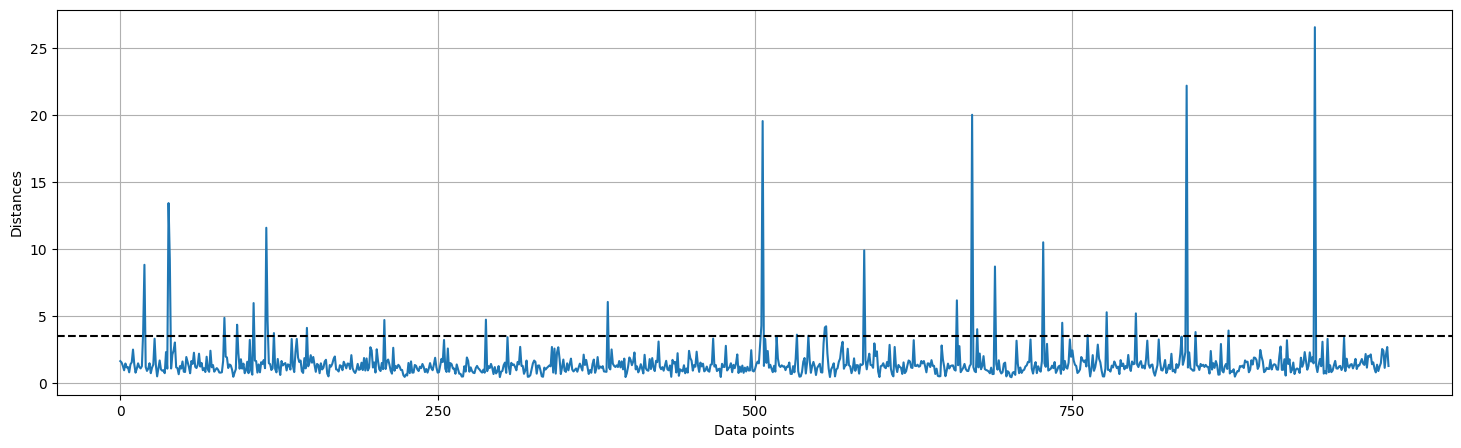

Method 3: use a threshold from the above plot
Outliers Found:  302


In [ ]:
# METHOD 3: use a threshold from the above plot, left panel    --> dk_th
# set a threshold
dk_th = 3.5

figKNN = plt.figure('kNN distance values', figsize=(18,5))
plt.plot(distances[:,-1][:1000])
plt.xlabel('Data points', fontsize=10)
plt.xticks(np.arange(0, 1000, step=250))
plt.ylabel('Distances', fontsize=10)
plt.axhline(dk_th, color='k', linestyle='--')
plt.grid()
plt.show()

id_points2remove_3 = dk_sorted_ind[ np.where( dk_sorted >= dk_th ) ]
id1_sorted_3       = np.sort(id_points2remove_3)
print('Method 3: use a threshold from the above plot')
count3 = len(id1_sorted_3)
print('Outliers Found: ',count3)
NN_labels3 = np.ones(N)
NN_labels3[id1_sorted_3] = -1

In [ ]:
# Count of outliers with each method

print('Method 1: Use the knee point ')
print('Outliers Found: ',count1)

print('\nMethod 2: Decide a percentage of outliers a-priori (n%) ')
print('Outliers Found: ',count2)

print('\nMethod 3: Use a threshold from the  plot')
print('Outliers Found: ',count3)


Method 1: Use the knee point 
Outliers Found:  303

Method 2: Decide a percentage of outliers a-priori (n%) 
Outliers Found:  357

Method 3: Use a threshold from the  plot
Outliers Found:  302


PCA: explained variation per principal component: [0.95 0.02 0.01]


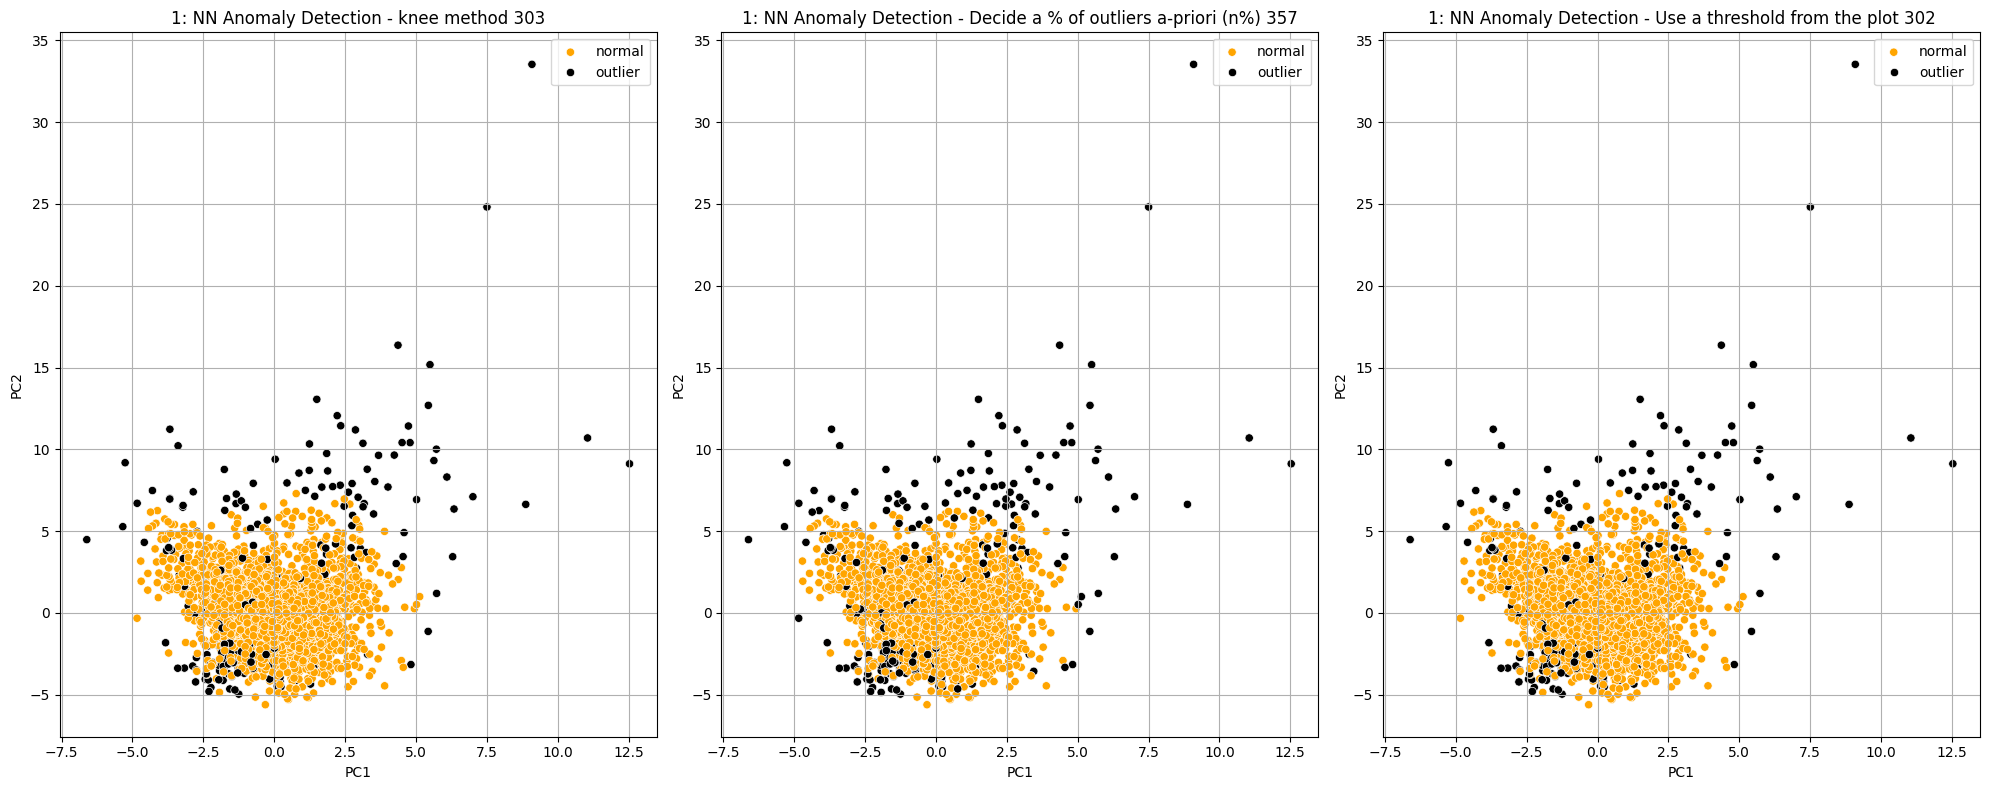

In [ ]:
## Visualizatio of NN

des1 = 'knee method'
des2 = 'Decide a % of outliers a-priori (n%)'
des3 = 'Use a threshold from the plot'
plotting_nn(NN_labels1, NN_labels2, NN_labels3, des1, des2, des3, pca_result, count1, count2, count3)

#### 2: Local Outlier Factor (LOF)

In [ ]:
# Apply the algorithm
from sklearn.neighbors import LocalOutlierFactor

lof_model  = LocalOutlierFactor(n_neighbors   = 200,
                                algorithm     = 'ball_tree',
                                metric        = 'minkowski',
                                p             = 2,
                                metric_params = None,
                                contamination = 0.05 )

# predict the labels (1 inlier, -1 outlier) of X according to LOF
LOF_labels = lof_model.fit_predict(X_transformed)

# LOF_values -- A more negative value indicates a higher likelihood of the point being an outlier.
LOF_values = lof_model.negative_outlier_factor_
# print(np.round(LOF_values,2))

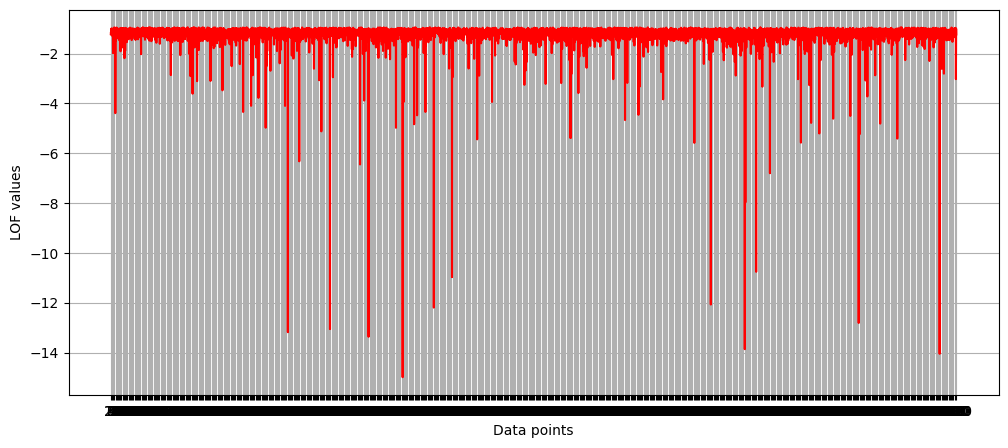

In [ ]:
# Verify the outlier detection, count and label the outliers
figLOF = plt.figure('LOF values', figsize=(12,5))
plt.xlabel('Data points', fontsize=10)
plt.xticks( np.arange(0, N, step=10) )
plt.ylabel('LOF values', fontsize=10)
plt.plot(LOF_values, 'r-')
plt.grid()
plt.show()

No of Outliers Found:  357


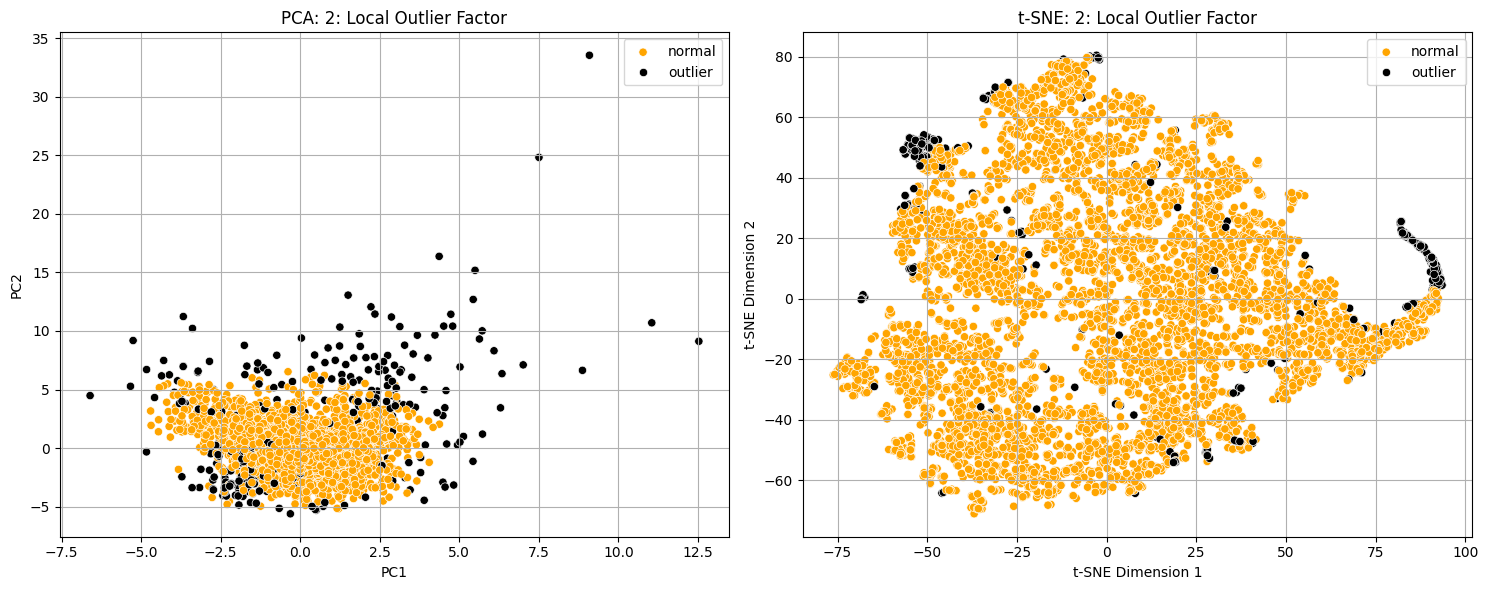

In [ ]:
# Count the no. of outliers
countLOF = len( LOF_labels[ LOF_labels == -1 ] )
print('No of Outliers Found: ',countLOF)
description = '2: Local Outlier Factor'
plotting( LOF_labels, description, pca_result, tsne_result )

#### 3: Isolation Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


No of Outliers Found:  311


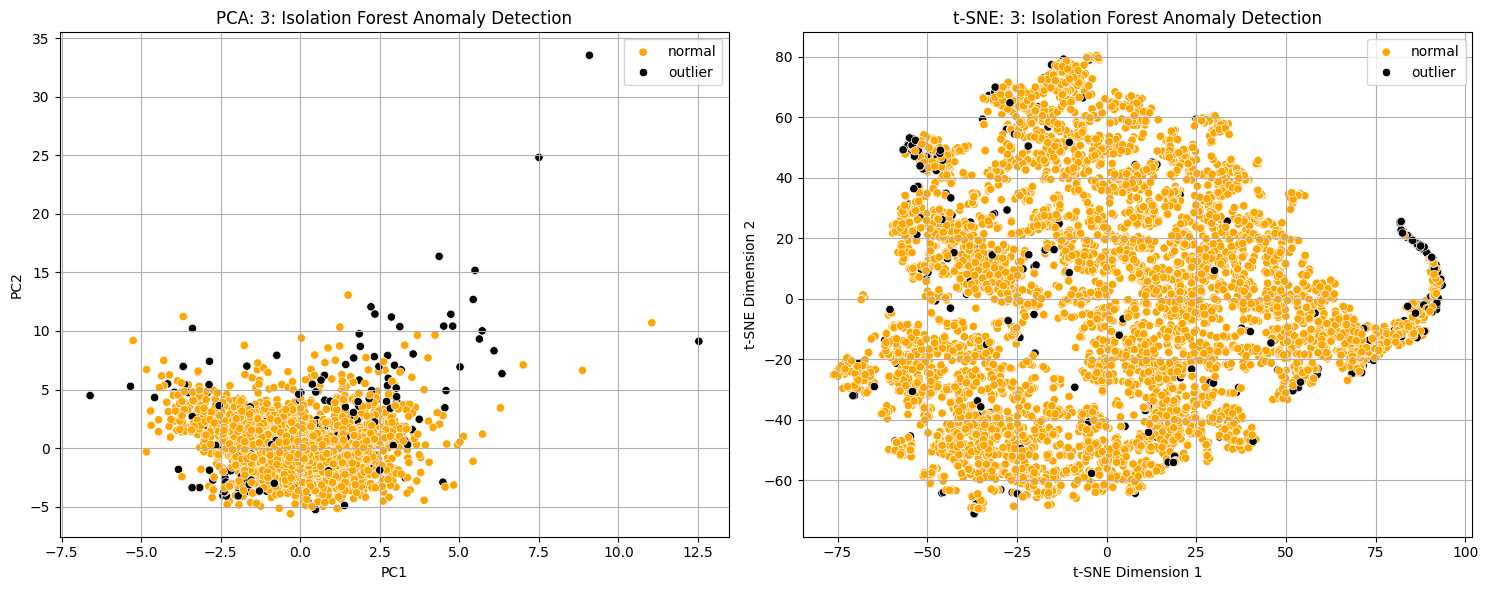

In [ ]:
# N_estimators here stands for the number of trees
# max sample here stands for the subset sample used in each round.
# iforest = IsolationForest( n_estimators = 100, contamination = .05, max_samples = 'auto')
iforest = IsolationForest( contamination = 'auto', random_state = 123 )
IF_labels = iforest.fit_predict( X_transformed )

# Count the no. of outliers
countIF = len( IF_labels[ IF_labels == -1 ] )
print('No of Outliers Found: ',countIF)

description = '3: Isolation Forest Anomaly Detection'
plotting( IF_labels, description, pca_result, tsne_result )

In [ ]:
# calculate the anomaly score of each data points.
# This way we can understand which data points are more abnormal.
# If anomaly score is higher, the more chances of a data point to be an outlier

if_anomaly_score  = iforest.decision_function( X_transformed )

### Check the coherence between outlier detection methods

In [ ]:
def cohereance_plotting( y1, y2, method_name, R ):
  # Visually inspect the match between the outliers found by the NN and LOF
  fig20 = plt.figure('Comparison spotted outliers', figsize=(18,5))
  plt.plot(y1[:1000], color ='blue', marker="o", label='NN')
  plt.plot(y2[:1000], color ='red', marker="x", label='LOF')
  plt.xlabel('Data points')
  plt.ylabel('Predicted label', fontsize=10)
  plt.title(f'Match on outlier detection between {method_name[0]} and {method_name[1]} (Rand index = {R})')
  plt.legend(method_name)
  plt.grid()
  plt.show()

# Function to print coherence metrics
def print_coherence_metrics(y_true, y_pred, method_name):
  print(f"Coherence metrics between {method_name[0]} and {method_name[1]}:")
  print(f"Homogeneity:  {metrics.homogeneity_score(y_true, y_pred):.3f}")
  print(f"Completeness: {metrics.completeness_score(y_true, y_pred):.3f}")
  print(f"V-measure:    {metrics.v_measure_score(y_true, y_pred):.3f}")
  R = round(metrics.adjusted_rand_score(y_true, y_pred), 3)
  print(f"Adjusted Rand Index:         {R:.3f}")
  print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y_true, y_pred):.3f}")

  cohereance_plotting( y1, y2, method_name, R )
  print("\n")

Coherence metrics between NN and LOF:
Homogeneity:  0.444
Completeness: 0.444
V-measure:    0.444
Adjusted Rand Index:         0.650
Adjusted Mutual Information: 0.444


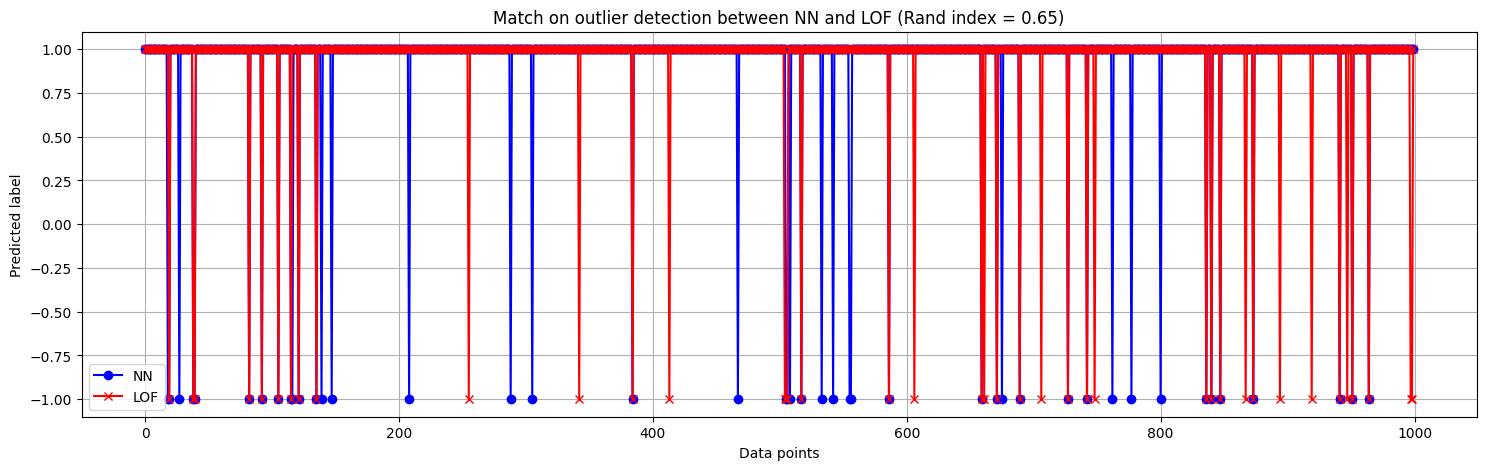



Coherence metrics between NN and IF:
Homogeneity:  0.179
Completeness: 0.199
V-measure:    0.189
Adjusted Rand Index:         0.380
Adjusted Mutual Information: 0.188


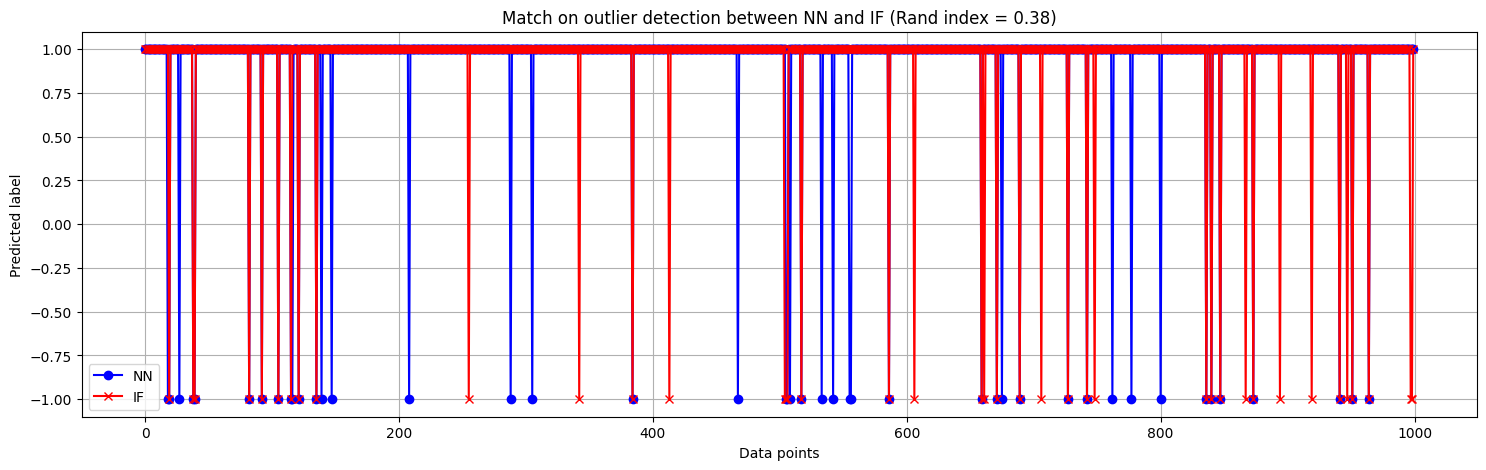



Coherence metrics between LOF and IF:
Homogeneity:  0.198
Completeness: 0.220
V-measure:    0.209
Adjusted Rand Index:         0.404
Adjusted Mutual Information: 0.208


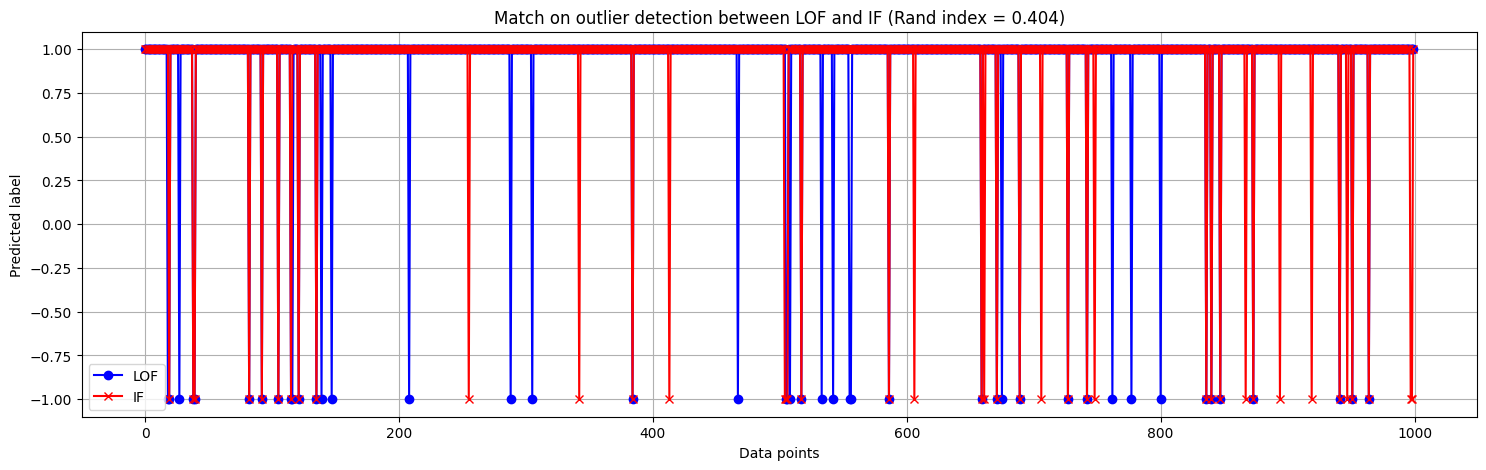

In [ ]:
from sklearn import metrics


#  labels from three outlier detection methods
y1 = NN_labels2
y2 = LOF_labels
y3 = IF_labels

# Compare each pair of methods
print_coherence_metrics( y1, y2, ["NN", "LOF"] )
print_coherence_metrics( y1, y3, ["NN", "IF"] )
print_coherence_metrics( y2, y3, ["LOF", "IF"] )


In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
def confusion_matrix_func( y1, y2, desc_list ):
  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y1, y2)

  # Plot the confusion matrix
  # plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
  plt.title( desc_list[1] )
  plt.xlabel( desc_list[0] )
  plt.ylabel('True Labels')
  plt.show()

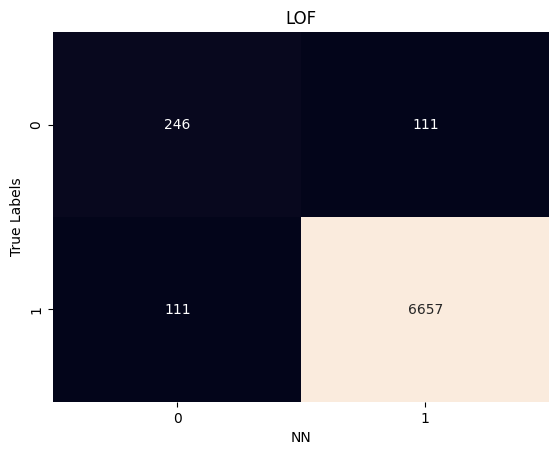

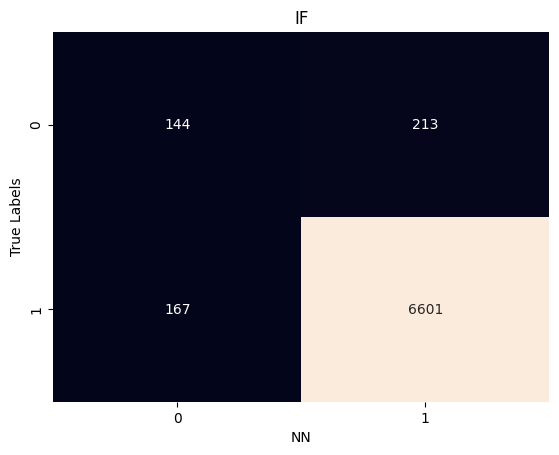

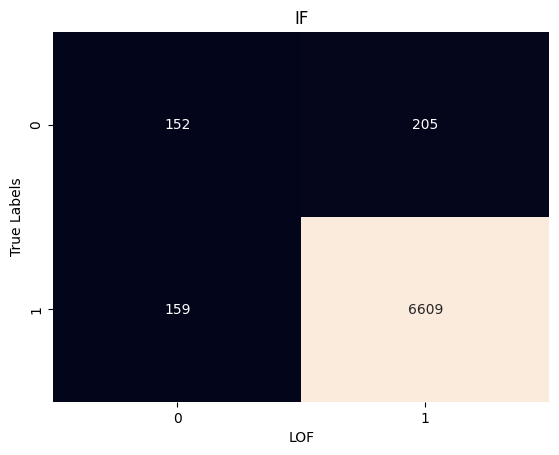

In [ ]:
confusion_matrix_func( y1, y2, ["NN", "LOF"] )
confusion_matrix_func( y1, y3, ["NN", "IF"]  )
confusion_matrix_func( y2, y3, ["LOF", "IF"] )

In [ ]:
## Among the three methods we have noticed that the Nearest Neighbours and the Local Outlier factor has the maximum Adjusted Rand Index value

### We have saved the Isolation Forest's Anomaly scores in the csv file

In [ ]:
## Append Anomaly score in the csv file
df_['anomaly_score'] = if_anomaly_score
print(df_.shape)
df_.head(5)

(7125, 19)


,1,2,3,4,5,6,8,9,10,11,12,14,16,17,18,19,20,21,anomaly_score
0,0.750000,1,0,1,1,1,1,0,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,0.028597
1,0.239583,1,1,1,1,1,1,1,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,0.143332
2,0.479167,1,1,1,1,1,1,1,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,0.156631
3,0.656250,0,1,1,1,1,1,1,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,0.146233
4,0.229167,1,1,1,1,1,1,1,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,0.155054


In [ ]:
final_file_name = 'Unsupervised_final_dataset.csv'
df_.to_csv( folder_path + final_file_name )